In [32]:
import pandas as pd
import numpy as np
import demoji
import emoji
import seaborn as sns
from transformers import T5ForConditionalGeneration, T5Tokenizer
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv("data/train.csv")

In [17]:
train_df.iloc[:, 5:]

,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,trend_id_res5,trend_id_res6,trend_id_res7,trend_id_res8,trend_id_res9,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4621,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
trend_cnts = train_df.iloc[:, 5:].sum(axis=0, numeric_only=True)

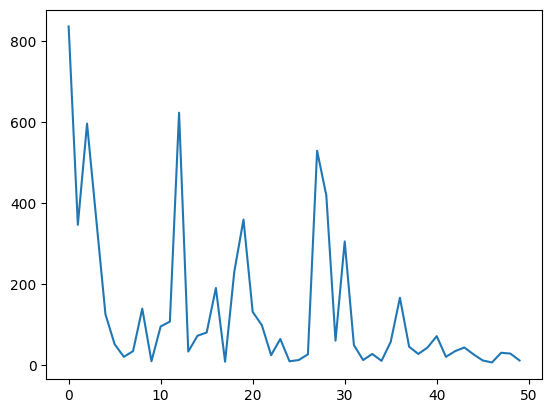

In [48]:
plt.plot(range(50), trend_cnts.values)
plt.show()

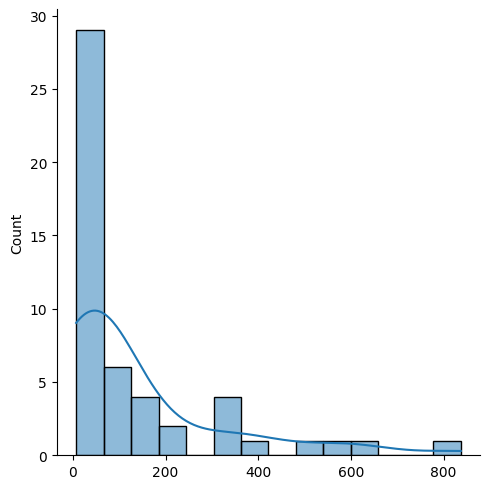

In [49]:
sns.displot(trend_cnts.values kde=True)

In [52]:
trend_cnts.sort_values(ascending=False)

trend_id_res0     837
trend_id_res12    624
trend_id_res2     597
trend_id_res27    530
trend_id_res28    420
trend_id_res3     361
trend_id_res19    360
trend_id_res1     347
trend_id_res30    306
trend_id_res18    231
trend_id_res16    191
trend_id_res36    167
trend_id_res8     140
trend_id_res20    132
trend_id_res4     126
trend_id_res11    108
trend_id_res21     99
trend_id_res10     96
trend_id_res15     81
trend_id_res14     73
trend_id_res40     72
trend_id_res23     65
trend_id_res29     61
trend_id_res35     58
trend_id_res5      52
trend_id_res31     50
trend_id_res37     46
trend_id_res39     44
trend_id_res43     44
trend_id_res42     35
trend_id_res7      35
trend_id_res13     34
trend_id_res47     31
trend_id_res48     29
trend_id_res33     28
trend_id_res38     28
trend_id_res26     27
trend_id_res44     27
trend_id_res22     25
trend_id_res6      21
trend_id_res41     21
trend_id_res25     13
trend_id_res32     13
trend_id_res45     12
trend_id_res49     12
trend_id_r

In [53]:
train_df[['text' 'assessment' 'tags']]

,text,assessment,tags
0,"Маленький выбор товаров, хотелось бы ассортиме...",6.0,"{ASSORTMENT,PROMOTIONS,DELIVERY}"
1,Быстро,4.0,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}"
2,Доставка постоянно задерживается,6.0,"{DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}"
3,Наценка и ассортимент расстраивают,6.0,"{PRICE,PROMOTIONS,ASSORTMENT}"
4,Можно немного скинуть минимальную сумму заказа...,6.0,"{PRICE,PROMOTIONS}"
...,...,...,...
4618,Привезли прокисший суп,2.0,{PRODUCTS_QUALITY}
4619,пойдет,6.0,{DELIVERY}
4620,Не дают абузить поддержка не возвращает деньги...,6.0,"{PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}"
4621,"Очень плохая доставка в первую очередь, постоя...",2.0,"{DELIVERY,PRODUCTS_QUALITY}"


In [56]:
['trend_id_res{}'.format(i) for i in range(50)]

['trend_id_res0',
 'trend_id_res1',
 'trend_id_res2',
 'trend_id_res3',
 'trend_id_res4',
 'trend_id_res5',
 'trend_id_res6',
 'trend_id_res7',
 'trend_id_res8',
 'trend_id_res9',
 'trend_id_res10',
 'trend_id_res11',
 'trend_id_res12',
 'trend_id_res13',
 'trend_id_res14',
 'trend_id_res15',
 'trend_id_res16',
 'trend_id_res17',
 'trend_id_res18',
 'trend_id_res19',
 'trend_id_res20',
 'trend_id_res21',
 'trend_id_res22',
 'trend_id_res23',
 'trend_id_res24',
 'trend_id_res25',
 'trend_id_res26',
 'trend_id_res27',
 'trend_id_res28',
 'trend_id_res29',
 'trend_id_res30',
 'trend_id_res31',
 'trend_id_res32',
 'trend_id_res33',
 'trend_id_res34',
 'trend_id_res35',
 'trend_id_res36',
 'trend_id_res37',
 'trend_id_res38',
 'trend_id_res39',
 'trend_id_res40',
 'trend_id_res41',
 'trend_id_res42',
 'trend_id_res43',
 'trend_id_res44',
 'trend_id_res45',
 'trend_id_res46',
 'trend_id_res47',
 'trend_id_res48',
 'trend_id_res49']

In [71]:
train_df[train_df['assessment'] == 3][['assessment', 'text']]# + ['trend_id_res{}'.format(i) for i in range(50)]].iloc[:5].style

,assessment,text
5,3.0,"Очень долгая доставка, по факту обещают привез..."
10,3.0,Доставка крайне редко приезжает в срок
21,3.0,Программу надо улучшить
25,3.0,Не следите за качеством продуктов
37,3.0,Нет никакой системы лояльности к постоянным кл...
...,...,...
4603,3.0,Привет
4605,3.0,"В целом неплохо,но доставка уже давно не [NUM]..."
4614,3.0,"Доставка намного дольше, чем обещали"
4617,3.0,"Продукты приносят не всегда качественные, бана..."


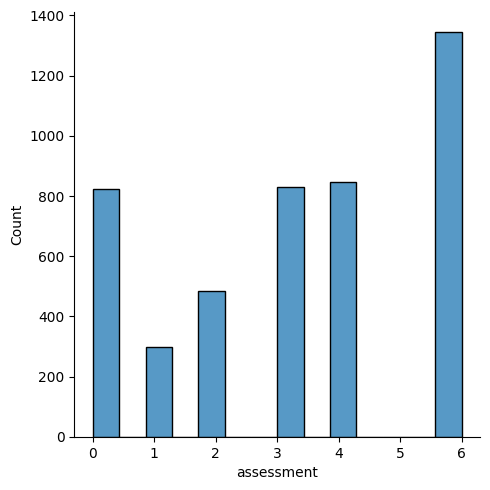

In [74]:
sns.displot(train_df['assessment'])

In [77]:
train_df.iloc[:, 5:].sum(axis=1, numeric_only=True).sort_values(ascending=False)

1597    4
2988    4
4056    4
2373    4
823     4
       ..
1854    1
1855    1
1856    1
1858    1
4622    1
Length: 4623, dtype: int64

In [83]:
train_df.iloc[1597][['assessment', 'text']].values

array([np.float64(6.0),
       'Никогда курьеры не читают комментарии к заказам! Вообще никогда! Ни разу за все время! Цены оставляют желать лучшего: очень завышены! Картофель по [NUM]-[NUM] руб кг! Серьезно??? Качество на [NUM] из [NUM]. Невозможность редактировать заказ, долгий возврат денег'],
      dtype=object)

In [84]:
train_df.iloc[1597]

Unnamed: 0                                                     3000
index                                                         10202
assessment                                                      6.0
tags              {ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...
text              Никогда курьеры не читают комментарии к заказа...
trend_id_res0                                                     0
trend_id_res1                                                     0
trend_id_res2                                                     0
trend_id_res3                                                     0
trend_id_res4                                                     0
trend_id_res5                                                     0
trend_id_res6                                                     0
trend_id_res7                                                     0
trend_id_res8                                                     0
trend_id_res9                                   

<Axes: >

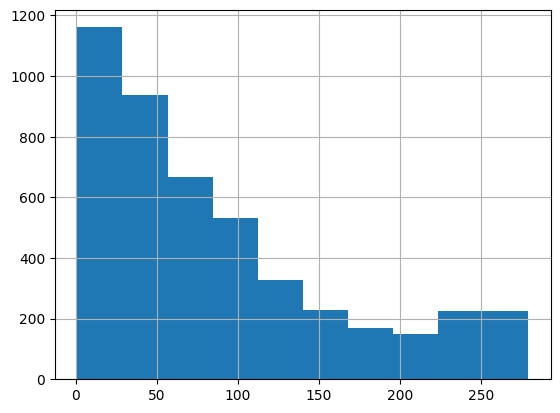

In [85]:
train_df['text'].str.len().hist()

In [89]:
train_df

,Unnamed: 0,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
0,0,5652,6.0,"{ASSORTMENT,PROMOTIONS,DELIVERY}","Маленький выбор товаров, хотелось бы ассортиме...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18092,4.0,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}",Быстро,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13845,6.0,"{DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}",Доставка постоянно задерживается,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,25060,6.0,"{PRICE,PROMOTIONS,ASSORTMENT}",Наценка и ассортимент расстраивают,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1428,6.0,"{PRICE,PROMOTIONS}",Можно немного скинуть минимальную сумму заказа...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,8701,26325,2.0,{PRODUCTS_QUALITY},Привезли прокисший суп,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4619,8703,661,6.0,{DELIVERY},пойдет,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4620,8704,1870,6.0,"{PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}",Не дают абузить поддержка не возвращает деньги...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4621,8705,22650,2.0,"{DELIVERY,PRODUCTS_QUALITY}","Очень плохая доставка в первую очередь, постоя...",1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [108]:
train_df['text'].str.len().sort_values().index

Index([1847, 1271, 4323, 1796, 4322,  490, 3480, 3856,  520, 1843,
       ...
        139,  981,  974, 3709,  938, 1968, 2061, 3377, 4327, 1998],
      dtype='int64', length=4623)

In [107]:
train_df[train_df['trend_id_res0'] == 1][['assessment','text', 'tags']].iloc[:10].style

,assessment,text,tags
5,3.000000,"Очень долгая доставка, по факту обещают привезти за [NUM] минут, но все время опаздывают . Так же бы хотелось чуть более удобный поиск в приложении","{ASSORTMENT,DELIVERY,CATALOG_NAVIGATION}"
9,0.000000,Долго,{DELIVERY}
31,2.000000,Слишком долгая доставка,{DELIVERY}
35,0.000000,"Курьеры как рабы работают у вас , почему их так мало .Ждёшь заказ по часу . Почему их так мало на смене!!!!!!!!!","{ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,CATALOG_NAVIGATION,PAYMENT,DELIVERY,SUPPORT}"
38,1.000000,"Доставка очень длительная, пришлось долго ждать",{DELIVERY}
41,0.000000,Оочень долгая доставка! Жду уже более [NUM] минут,{DELIVERY}
44,6.000000,"Очень долгая доставка, написано до [NUM] минут, или что курьер будет вот вот у вас, а по итогу доставка в среднем [NUM]-[NUM] минут","{DELIVERY,ASSORTMENT,PRICE,PRODUCTS_QUALITY}"
45,4.000000,"очень долгая доставка. не смотря на то, что мы находимся возле склада самоката",{DELIVERY}
50,3.000000,"Долгая доставка, часты задержки по времени, в сравнении с пятёрочкой и магнитом цены на [NUM]-[NUM]% выше , хоть раньше разница не была такой существенной","{DELIVERY,PRICE,ASSORTMENT}"
54,3.000000,Долгая доставка,{DELIVERY}


In [109]:
train_df.iloc[train_df['text'].str.len().sort_values().index]

,Unnamed: 0,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
1847,3451,18903,0.0,"{PRODUCTS_QUALITY,PRICE,PROMOTIONS,DELIVERY,SU...",…,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1271,2398,1529,0.0,{DELIVERY},Г,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4323,8143,21595,2.0,"{ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...",.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,3357,9362,2.0,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,PROMOTIONS}",-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4322,8142,221,6.0,"{ASSORTMENT,PRODUCTS_QUALITY,PAYMENT,DELIVERY,...",Н,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,3696,21560,6.0,"{ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...",Сервис подиспортился-стала долгая доставка [NU...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2061,3895,20790,4.0,"{ASSORTMENT,DELIVERY}",Время доставки категорически не соблюдается. П...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3377,6369,20217,6.0,"{DELIVERY,PROMOTIONS}",Очень часто задерживается доставка заказа. Быв...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4327,8156,11858,3.0,"{SUPPORT,DELIVERY}","Обман[NUM]-Зачем указывать, что доставка [NUM]...",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
uniques_df = train_df.groupby('text')['index'].nunique()

In [135]:
train_df.groupby('text').nunique()

,Unnamed: 0,index,assessment,tags,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,trend_id_res5,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
text,,,,,,,,,,,,,,,,,,,,,
!,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
!!!!,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"""За [NUM] минут до дома"" постепенно начали превращаться в ""Ну [NUM]-[NUM] минуток..."". Вероятно увеличилось число заказов, но количество курьеров не поспевает за изменениями, who knows",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
(,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"+ быстрая доставка. -высокие цены, маленький ассортимент, небольшой захват территории",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🤷‍♂️,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
🥲,2,2,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
🦉,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [131]:
uniques_df

text
!                                                                                                                                                                                           1
!!!!                                                                                                                                                                                        1
"За [NUM] минут до дома" постепенно начали превращаться в "Ну [NUM]-[NUM] минуток...". Вероятно увеличилось число заказов, но количество курьеров не поспевает за изменениями, who knows    1
(                                                                                                                                                                                           1
+ быстрая доставка. -высокие цены, маленький ассортимент, небольшой захват территории                                                                                                       1
                                             

In [143]:
sub_uniqs_df = (
    train_df[train_df['text'].isin(uniques_df[uniques_df > 1].index)].sort_values(by='text')
    .groupby('text')
    .sum()
    [[f"trend_id_res{i}" for i in range(50)]]
)

In [152]:
print(',\n| '.join([f'(sub_uniqs_df["trend_id_res{i}"] == 1)' for i in range(50)]))

(sub_uniqs_df["trend_id_res0"] == 1)
| (sub_uniqs_df["trend_id_res1"] == 1)
| (sub_uniqs_df["trend_id_res2"] == 1)
| (sub_uniqs_df["trend_id_res3"] == 1)
| (sub_uniqs_df["trend_id_res4"] == 1)
| (sub_uniqs_df["trend_id_res5"] == 1)
| (sub_uniqs_df["trend_id_res6"] == 1)
| (sub_uniqs_df["trend_id_res7"] == 1)
| (sub_uniqs_df["trend_id_res8"] == 1)
| (sub_uniqs_df["trend_id_res9"] == 1)
| (sub_uniqs_df["trend_id_res10"] == 1)
| (sub_uniqs_df["trend_id_res11"] == 1)
| (sub_uniqs_df["trend_id_res12"] == 1)
| (sub_uniqs_df["trend_id_res13"] == 1)
| (sub_uniqs_df["trend_id_res14"] == 1)
| (sub_uniqs_df["trend_id_res15"] == 1)
| (sub_uniqs_df["trend_id_res16"] == 1)
| (sub_uniqs_df["trend_id_res17"] == 1)
| (sub_uniqs_df["trend_id_res18"] == 1)
| (sub_uniqs_df["trend_id_res19"] == 1)
| (sub_uniqs_df["trend_id_res20"] == 1)
| (sub_uniqs_df["trend_id_res21"] == 1)
| (sub_uniqs_df["trend_id_res22"] == 1)
| (sub_uniqs_df["trend_id_res23"] == 1)
| (sub_uniqs_df["trend_id_res24"] == 1)
| (sub_uniqs

In [174]:
wrong_indexes = train_df[train_df['text'].isin(sub_uniqs_df[
    (sub_uniqs_df["trend_id_res0"] == 1)
    | (sub_uniqs_df["trend_id_res1"] == 1)
    | (sub_uniqs_df["trend_id_res2"] == 1)
    | (sub_uniqs_df["trend_id_res3"] == 1)
    | (sub_uniqs_df["trend_id_res4"] == 1)
    | (sub_uniqs_df["trend_id_res5"] == 1)
    | (sub_uniqs_df["trend_id_res6"] == 1)
    | (sub_uniqs_df["trend_id_res7"] == 1)
    | (sub_uniqs_df["trend_id_res8"] == 1)
    | (sub_uniqs_df["trend_id_res9"] == 1)
    | (sub_uniqs_df["trend_id_res10"] == 1)
    | (sub_uniqs_df["trend_id_res11"] == 1)
    | (sub_uniqs_df["trend_id_res12"] == 1)
    | (sub_uniqs_df["trend_id_res13"] == 1)
    | (sub_uniqs_df["trend_id_res14"] == 1)
    | (sub_uniqs_df["trend_id_res15"] == 1)
    | (sub_uniqs_df["trend_id_res16"] == 1)
    | (sub_uniqs_df["trend_id_res17"] == 1)
    | (sub_uniqs_df["trend_id_res18"] == 1)
    | (sub_uniqs_df["trend_id_res19"] == 1)
    | (sub_uniqs_df["trend_id_res20"] == 1)
    | (sub_uniqs_df["trend_id_res21"] == 1)
    | (sub_uniqs_df["trend_id_res22"] == 1)
    | (sub_uniqs_df["trend_id_res23"] == 1)
    | (sub_uniqs_df["trend_id_res24"] == 1)
    | (sub_uniqs_df["trend_id_res25"] == 1)
    | (sub_uniqs_df["trend_id_res26"] == 1)
    | (sub_uniqs_df["trend_id_res27"] == 1)
    | (sub_uniqs_df["trend_id_res28"] == 1)
    | (sub_uniqs_df["trend_id_res29"] == 1)
    | (sub_uniqs_df["trend_id_res30"] == 1)
    | (sub_uniqs_df["trend_id_res31"] == 1)
    | (sub_uniqs_df["trend_id_res32"] == 1)
    | (sub_uniqs_df["trend_id_res33"] == 1)
    | (sub_uniqs_df["trend_id_res34"] == 1)
    | (sub_uniqs_df["trend_id_res35"] == 1)
    | (sub_uniqs_df["trend_id_res36"] == 1)
    | (sub_uniqs_df["trend_id_res37"] == 1)
    | (sub_uniqs_df["trend_id_res38"] == 1)
    | (sub_uniqs_df["trend_id_res39"] == 1)
    | (sub_uniqs_df["trend_id_res40"] == 1)
    | (sub_uniqs_df["trend_id_res41"] == 1)
    | (sub_uniqs_df["trend_id_res42"] == 1)
    | (sub_uniqs_df["trend_id_res43"] == 1)
    | (sub_uniqs_df["trend_id_res44"] == 1)
    | (sub_uniqs_df["trend_id_res45"] == 1)
    | (sub_uniqs_df["trend_id_res46"] == 1)
    | (sub_uniqs_df["trend_id_res47"] == 1)
    | (sub_uniqs_df["trend_id_res48"] == 1)
    | (sub_uniqs_df["trend_id_res49"] == 1)
].index)].sort_values('text')['index'].values
# [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]

In [168]:
wrong_indexes_2 = [i for i in wrong_indexes if i not in [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]]

In [172]:
train_df[~train_df['index'].isin(wrong_indexes_2)].to_csv('data/train_df_clean.csv', index=False)

In [178]:
train_df[train_df['text'].isin(sub_uniqs_df[
    (sub_uniqs_df["trend_id_res0"] == 1)
    | (sub_uniqs_df["trend_id_res1"] == 1)
    | (sub_uniqs_df["trend_id_res2"] == 1)
    | (sub_uniqs_df["trend_id_res3"] == 1)
    | (sub_uniqs_df["trend_id_res4"] == 1)
    | (sub_uniqs_df["trend_id_res5"] == 1)
    | (sub_uniqs_df["trend_id_res6"] == 1)
    | (sub_uniqs_df["trend_id_res7"] == 1)
    | (sub_uniqs_df["trend_id_res8"] == 1)
    | (sub_uniqs_df["trend_id_res9"] == 1)
    | (sub_uniqs_df["trend_id_res10"] == 1)
    | (sub_uniqs_df["trend_id_res11"] == 1)
    | (sub_uniqs_df["trend_id_res12"] == 1)
    | (sub_uniqs_df["trend_id_res13"] == 1)
    | (sub_uniqs_df["trend_id_res14"] == 1)
    | (sub_uniqs_df["trend_id_res15"] == 1)
    | (sub_uniqs_df["trend_id_res16"] == 1)
    | (sub_uniqs_df["trend_id_res17"] == 1)
    | (sub_uniqs_df["trend_id_res18"] == 1)
    | (sub_uniqs_df["trend_id_res19"] == 1)
    | (sub_uniqs_df["trend_id_res20"] == 1)
    | (sub_uniqs_df["trend_id_res21"] == 1)
    | (sub_uniqs_df["trend_id_res22"] == 1)
    | (sub_uniqs_df["trend_id_res23"] == 1)
    | (sub_uniqs_df["trend_id_res24"] == 1)
    | (sub_uniqs_df["trend_id_res25"] == 1)
    | (sub_uniqs_df["trend_id_res26"] == 1)
    | (sub_uniqs_df["trend_id_res27"] == 1)
    | (sub_uniqs_df["trend_id_res28"] == 1)
    | (sub_uniqs_df["trend_id_res29"] == 1)
    | (sub_uniqs_df["trend_id_res30"] == 1)
    | (sub_uniqs_df["trend_id_res31"] == 1)
    | (sub_uniqs_df["trend_id_res32"] == 1)
    | (sub_uniqs_df["trend_id_res33"] == 1)
    | (sub_uniqs_df["trend_id_res34"] == 1)
    | (sub_uniqs_df["trend_id_res35"] == 1)
    | (sub_uniqs_df["trend_id_res36"] == 1)
    | (sub_uniqs_df["trend_id_res37"] == 1)
    | (sub_uniqs_df["trend_id_res38"] == 1)
    | (sub_uniqs_df["trend_id_res39"] == 1)
    | (sub_uniqs_df["trend_id_res40"] == 1)
    | (sub_uniqs_df["trend_id_res41"] == 1)
    | (sub_uniqs_df["trend_id_res42"] == 1)
    | (sub_uniqs_df["trend_id_res43"] == 1)
    | (sub_uniqs_df["trend_id_res44"] == 1)
    | (sub_uniqs_df["trend_id_res45"] == 1)
    | (sub_uniqs_df["trend_id_res46"] == 1)
    | (sub_uniqs_df["trend_id_res47"] == 1)
    | (sub_uniqs_df["trend_id_res48"] == 1)
    | (sub_uniqs_df["trend_id_res49"] == 1)
].index)].sort_values(['text', 'assessment']).style
# [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]

,Unnamed: 0,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,trend_id_res5,trend_id_res6,trend_id_res7,trend_id_res8,trend_id_res9,trend_id_res10,trend_id_res11,trend_id_res12,trend_id_res13,trend_id_res14,trend_id_res15,trend_id_res16,trend_id_res17,trend_id_res18,trend_id_res19,trend_id_res20,trend_id_res21,trend_id_res22,trend_id_res23,trend_id_res24,trend_id_res25,trend_id_res26,trend_id_res27,trend_id_res28,trend_id_res29,trend_id_res30,trend_id_res31,trend_id_res32,trend_id_res33,trend_id_res34,trend_id_res35,trend_id_res36,trend_id_res37,trend_id_res38,trend_id_res39,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
1,1,18092,4.000000,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}",Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1806,3379,25486,4.000000,{PRICE},Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,40,5891,6.000000,"{PRICE,PROMOTIONS,CATALOG_NAVIGATION}",Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
781,1431,2416,6.000000,{DELIVERY},Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1699,3192,6658,6.000000,"{ASSORTMENT,PRICE,PROMOTIONS}",Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,5920,15924,6.000000,"{ASSORTMENT,PRICE,PROMOTIONS}",Быстро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3211,6035,21908,4.000000,"{ASSORTMENT,PROMOTIONS}",Все круто,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3719,7040,113,6.000000,{DELIVERY},Все круто,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3397,6397,27017,0.000000,nan,Все отлично,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4212,7963,26749,4.000000,{PROMOTIONS},Все отлично,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
pd.read_csv('data/test.csv')['assessment'].value_counts()

assessment
6.0    2653
0.0    1648
3.0    1603
4.0    1579
2.0     963
1.0     569
Name: count, dtype: int64

In [204]:
pd.read_csv('data/test.csv')

,Unnamed: 0,index,assessment,tags,text
0,1,3135,3.0,{DELIVERY},"Последнее время думаю плохо, сроки доставки да..."
1,3,4655,2.0,"{PRICE,DELIVERY,ASSORTMENT}",Цены намного выше магазинных но радуют акции
2,5,22118,2.0,"{CATALOG_NAVIGATION,ASSORTMENT,DELIVERY}","Доставка за [NUM] минут, заказ даже не начали ..."
3,7,23511,0.0,{DELIVERY},Ужасно долгая доставка
4,8,45,6.0,"{ASSORTMENT,PROMOTIONS}",Добрый вечер! Вы большие молодцы. Меня всё уст...
...,...,...,...,...,...
9010,16992,3523,3.0,"{PRICE,SUPPORT,DELIVERY}",Задержка с доставкой не даете промокод на скид...
9011,16993,24925,6.0,"{PRICE,PRODUCTS_QUALITY,ASSORTMENT}",Очень удобный формат сервиса и очень маленький...
9012,16994,6327,6.0,"{PAYMENT,ASSORTMENT,DELIVERY}","Сумма заказа почти всегда высокая, что зачасту..."
9013,16997,530,3.0,"{PRODUCTS_QUALITY,SUPPORT,DELIVERY}","Часто, заказываю у вас молочную продукцию, при..."


In [237]:
(
    pd.read_csv('data/test.csv')
    .groupby('index')
    # .apply(lambda x: print(x['text'].item()))
    .apply(
        lambda x: emoji.demojize(str(x['text'].item()), language='ru').replace(':', '').replace('_', ' ')
    )
    .sort_values(key=lambda col: col.str.len())
    .iloc[:50]
)

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_54687/3606067956.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pd.read_csv('data/test.csv')


index
7875     -
12901    .
3330     .
5017     Я
25931    .
1834     .
26816    М
5391     .
9773     ы
6473     .
23274    (
20688    -
21950    .
25445    Z
25396    .
25381    О
21942    Я
15781    Т
21310    .
24522    …
26603    !
26701    о
26574    -
8678     -
13513    .
25345    -
7590     .
21298    .
21222    )
20753    г
21215    .
20961    .
22099    ш
25664    .
15438    Т
22092    .
12261    (
9236     .
21035    -
3783     .
17779    .
21056    .
9118     .
15381    .
282      О
15344    …
21090    .
20825    !
25820    .
11927    .
dtype: object

In [196]:
demoji.set_emoji_pattern

''

In [232]:
emoji.demojize('asdasdas 🫡', language='ru')

'asdasdas :воинское_приветствие:'

In [5]:
train_df_clean = pd.read_csv('data/train_df_clean.csv')

In [265]:
train_df_clean['text'] = (
    train_df_clean['text']
    .apply(lambda x: emoji.demojize(x, language='ru').replace("_", " "))
    .sort_values(key=lambda col: col.str.len())
)

In [266]:
train_df_clean.to_csv('data/train_df_demojitized.csv')

In [267]:
train_df_clean

,Unnamed: 0,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
0,0,5652,6.0,"{ASSORTMENT,PROMOTIONS,DELIVERY}","Маленький выбор товаров, хотелось бы ассортиме...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18092,4.0,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}",Быстро,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13845,6.0,"{DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}",Доставка постоянно задерживается,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,25060,6.0,"{PRICE,PROMOTIONS,ASSORTMENT}",Наценка и ассортимент расстраивают,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1428,6.0,"{PRICE,PROMOTIONS}",Можно немного скинуть минимальную сумму заказа...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,8701,26325,2.0,{PRODUCTS_QUALITY},Привезли прокисший суп,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4577,8703,661,6.0,{DELIVERY},пойдет,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4578,8704,1870,6.0,"{PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}",Не дают абузить поддержка не возвращает деньги...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4579,8705,22650,2.0,"{DELIVERY,PRODUCTS_QUALITY}","Очень плохая доставка в первую очередь, постоя...",1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [268]:
trend_cnts.sort_values(ascending=True)

trend_id_res46      7
trend_id_res17      9
trend_id_res24     10
trend_id_res9      10
trend_id_res34     11
trend_id_res45     12
trend_id_res49     12
trend_id_res25     13
trend_id_res32     13
trend_id_res41     21
trend_id_res6      21
trend_id_res22     25
trend_id_res26     27
trend_id_res44     27
trend_id_res38     28
trend_id_res33     28
trend_id_res48     29
trend_id_res47     31
trend_id_res13     34
trend_id_res7      35
trend_id_res42     35
trend_id_res39     44
trend_id_res43     44
trend_id_res37     46
trend_id_res31     50
trend_id_res5      52
trend_id_res35     58
trend_id_res29     61
trend_id_res23     65
trend_id_res40     72
trend_id_res14     73
trend_id_res15     81
trend_id_res10     96
trend_id_res21     99
trend_id_res11    108
trend_id_res4     126
trend_id_res20    132
trend_id_res8     140
trend_id_res36    167
trend_id_res16    191
trend_id_res18    231
trend_id_res30    306
trend_id_res1     347
trend_id_res19    360
trend_id_res3     361
trend_id_r

In [285]:
print(',\n& '.join([f'(train_df_clean["trend_id_res{i}"] == 0)' for i in range(50)]))

(train_df_clean["trend_id_res0"] == 0)
& (train_df_clean["trend_id_res1"] == 0)
& (train_df_clean["trend_id_res2"] == 0)
& (train_df_clean["trend_id_res3"] == 0)
& (train_df_clean["trend_id_res4"] == 0)
& (train_df_clean["trend_id_res5"] == 0)
& (train_df_clean["trend_id_res6"] == 0)
& (train_df_clean["trend_id_res7"] == 0)
& (train_df_clean["trend_id_res8"] == 0)
& (train_df_clean["trend_id_res9"] == 0)
& (train_df_clean["trend_id_res10"] == 0)
& (train_df_clean["trend_id_res11"] == 0)
& (train_df_clean["trend_id_res12"] == 0)
& (train_df_clean["trend_id_res13"] == 0)
& (train_df_clean["trend_id_res14"] == 0)
& (train_df_clean["trend_id_res15"] == 0)
& (train_df_clean["trend_id_res16"] == 0)
& (train_df_clean["trend_id_res17"] == 0)
& (train_df_clean["trend_id_res18"] == 0)
& (train_df_clean["trend_id_res19"] == 0)
& (train_df_clean["trend_id_res20"] == 0)
& (train_df_clean["trend_id_res21"] == 0)
& (train_df_clean["trend_id_res22"] == 0)
& (train_df_clean["trend_id_res23"] == 0)
& (t

In [12]:
trend_id_res9 = train_df_clean[
    True
    & (train_df_clean["trend_id_res0"] == 0)
    & (train_df_clean["trend_id_res1"] == 0)
    & (train_df_clean["trend_id_res2"] == 0)
    & (train_df_clean["trend_id_res3"] == 0)
    & (train_df_clean["trend_id_res4"] == 0)
    & (train_df_clean["trend_id_res5"] == 0)
    & (train_df_clean["trend_id_res6"] == 0)
    & (train_df_clean["trend_id_res7"] == 0)
    & (train_df_clean["trend_id_res8"] == 0)
    & (train_df_clean["trend_id_res9"] == 1)
    & (train_df_clean["trend_id_res10"] == 0)
    & (train_df_clean["trend_id_res11"] == 0)
    & (train_df_clean["trend_id_res12"] == 0)
    & (train_df_clean["trend_id_res13"] == 0)
    & (train_df_clean["trend_id_res14"] == 0)
    & (train_df_clean["trend_id_res15"] == 0)
    & (train_df_clean["trend_id_res16"] == 0)
    & (train_df_clean['trend_id_res17'] == 0)
    & (train_df_clean["trend_id_res18"] == 0)
    & (train_df_clean["trend_id_res19"] == 0)
    & (train_df_clean["trend_id_res20"] == 0)
    & (train_df_clean["trend_id_res21"] == 0)
    & (train_df_clean["trend_id_res22"] == 0)
    & (train_df_clean["trend_id_res23"] == 0)
    & (train_df_clean["trend_id_res24"] == 0)
    & (train_df_clean["trend_id_res25"] == 0)
    & (train_df_clean["trend_id_res26"] == 0)
    & (train_df_clean["trend_id_res27"] == 0)
    & (train_df_clean["trend_id_res28"] == 0)
    & (train_df_clean["trend_id_res29"] == 0)
    & (train_df_clean["trend_id_res30"] == 0)
    & (train_df_clean["trend_id_res31"] == 0)
    & (train_df_clean["trend_id_res32"] == 0)
    & (train_df_clean["trend_id_res33"] == 0)
    & (train_df_clean["trend_id_res34"] == 0)
    & (train_df_clean["trend_id_res35"] == 0)
    & (train_df_clean["trend_id_res36"] == 0)
    & (train_df_clean["trend_id_res37"] == 0)
    & (train_df_clean["trend_id_res38"] == 0)
    & (train_df_clean["trend_id_res39"] == 0)
    & (train_df_clean["trend_id_res40"] == 0)
    & (train_df_clean["trend_id_res41"] == 0)
    & (train_df_clean["trend_id_res42"] == 0)
    & (train_df_clean["trend_id_res43"] == 0)
    & (train_df_clean["trend_id_res44"] == 0)
    & (train_df_clean["trend_id_res45"] == 0)
    & (train_df_clean["trend_id_res46"] == 0)
    & (train_df_clean["trend_id_res47"] == 0)
    & (train_df_clean["trend_id_res48"] == 0)
    & (train_df_clean["trend_id_res49"] == 0)
] #['text'].values

In [13]:
trend_id_res9

,Unnamed: 0.1,Unnamed: 0,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
734,734,1347,22142,0.0,"{CATALOG_NAVIGATION,DELIVERY,SUPPORT}",Отвратительно постоянно меняется стоимость кор...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,901,1682,24415,2.0,"{PAYMENT,PRICE}","Не нравится, что при заказе сумма минимального...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,1739,3286,13445,6.0,"{PAYMENT,PRICE,DELIVERY}",От момента входа в приложения и добавления в к...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,2193,4143,23325,0.0,{DELIVERY},"Сервис позиционируется как магазин у дома , до...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df_clean = pd.read_csv('data/train_df_demojitized.csv')

In [10]:
device = 'cpu'

model_name = 'utrobinmv/t5_translate_en_ru_zh_small_1024'
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# prefix = 'translate to zh: '
# src_text = prefix + "Цель разработки — предоставить пользователям личного синхронного переводчика."

# # translate Russian to Chinese
# input_ids = tokenizer(src_text, return_tensors="pt")

# generated_tokens = model.generate(**input_ids.to(device))

# result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# print(result)

In [54]:
def augment(df, col_name, langs):
    df_part = df[df[col_name] == 1]
    texts = df_part['text'].to_list()
    for lang in langs + ['ru']:
        print(col_name, lang)
        texts = tokenizer.batch_decode(
            model.generate(
                **tokenizer(
                    [
                        f'translate to {lang}: {text}'
                        for text in texts
                    ],
                    padding=True,
                    return_tensors="pt"
                )
                .to(device)
            ),
            skip_special_tokens=True
        )
    df_part.loc[:, 'text'] = texts
    df_part.loc[:, 'index'] = np.nan
    return df_part


In [83]:
def augment_atomary(df, col_name, langs):
    df_part = df[df[col_name] == 1]
    texts = df_part['text'].to_list()
    for lang in langs + ['ru']:
        new_texts = []
        print(col_name, lang)
        for text in texts:
            print(text)
            new_texts.append(tokenizer.batch_decode(
                model.generate(
                    **tokenizer(
                        [f'translate to {lang}: {text}'],
                        padding=True,
                        return_tensors="pt"
                    )
                    .to(device)
                ),
                skip_special_tokens=True
            )[0])
            print(new_texts[-1])
        texts = new_texts[::]
    df_part.loc[:, 'text'] = texts
    df_part.loc[:, 'index'] = np.nan
    return df_part


In [52]:
train_df_augmented = train_df_clean.iloc[:, 1:]

In [66]:
df_parts_ready = df_parts[:-1]

In [67]:
len(df_parts_ready)

78

In [70]:
for col_name in [
    # 'trend_id_res6',
    # 'trend_id_res7',
    # 'trend_id_res9',
    # 'trend_id_res13',
    # 'trend_id_res17',
    # 'trend_id_res22',
    # 'trend_id_res24',
    # 'trend_id_res25',
    # 'trend_id_res26',
    # 'trend_id_res32',
    # 'trend_id_res33',
    # 'trend_id_res34',
    # 'trend_id_res37',
    # 'trend_id_res38', !!! ['en']
    # 'trend_id_res39',
    # 'trend_id_res41',
    # 'trend_id_res42',
    # 'trend_id_res43',
    # 'trend_id_res44', !!!
    'trend_id_res45',
    'trend_id_res46',
    'trend_id_res47',
    'trend_id_res48',
    'trend_id_res49'
]:
    for langs in [['en'], ['zh'], ['en', 'zh'], ['zh', 'en'], ['en', 'ru', 'zh'], ['zh', 'ru', 'en']]:
        df_parts_ready.append(augment(train_df_augmented, col_name, langs))

trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 en
trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 en
trend_id_res45 ru
trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 ru
trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 ru
trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 ru
trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 ru
trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 ru
trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 ru
trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 ru
trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 ru
trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 ru
trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


In [84]:
df_parts = []
for col_name in ['trend_id_res38', 'trend_id_res44',]:
    for langs in [['en'], ['zh'], ['en', 'zh'], ['zh', 'en'], ['en', 'ru', 'zh'], ['zh', 'ru', 'en']]:
        df_parts.append(augment_atomary(train_df_augmented, col_name, langs))

trend_id_res38 en
Нравиться что минимальная сумма доставки маленькая. Но после одного раза когда мне ни позвонили, ни написали и просто отменили мой заказ из за якобы невозможности связаться страшно заказывать, потому что не хочется повторения ситуации когда сидишь и ждёшь
Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
The service is disgusting. Payed the order, waited half an hour, wrote that the courier was delayed, and then just in the app saw a mark that the order was canceled. Called - said that the courier cancelled the orde

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


喜欢最小的送货量很小。 但当我接到电话或写信后,我只是因为无法联系而取消了我的订单,很难订购,因为不想重复坐在等待中的情况
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
服务令人恶心。 支付订单,等待半小时,写信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
The service is disgusting. Payed the order, waited half an hour, wrote that the courier was delayed, and then just in the app saw a mark that the order was canceled. Called - said that the courier cancelled the order, because he can not pass. Generally delusions. Money did not return
Идея неплохая, но исполнение похрамывает. Периодически просроченную еду привозите, битые фрукты. Иногда курьеры отменяют заказ, если мне не дозвонились, хотя и не пытались, да и зачем мне звонить, если ад

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


喜欢最小的送货量很小。 但当我接到电话或写信后,我只是因为无法联系而取消了我的订单,很难订购,因为不想重复坐在等待中的情况
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
服务令人恶心。 支付订单,等待半小时,写信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
The service is disgusting. Payed the order, waited half an hour, wrote that the courier was delayed, and then just in the app saw a mark that the order was canceled. Called - said that the courier cancelled the order, because he can not pass. Generally delusions. Money did not return
Идея неплохая, но исполнение похрамывает. Периодически просроченную еду привозите, битые фрукты. Иногда курьеры отменяют заказ, если мне не дозвонились, хотя и не пытались, да и зачем мне звонить, если ад

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


喜欢最小的送货量很小。 但当我接到电话或写信后,我只是因为无法联系而取消了我的订单,很难订购,因为不想重复坐在等待中的情况
Сервис отвратительный. Оплатила заказ, ждала полчаса, написали, что курьер задерживается, а потом просто в приложении увидела отметку, что заказ отменен. Позвонила,- сказали, что курьер отменил заказ, тк не может проехать. Вообще бред. Деньги не вернули
服务令人恶心。 支付订单,等待半小时,写信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信信

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
Improving the working conditions for couriers and cases will go to the mountain.
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
Further more, raise the salary of couriers, they are you and make grandma!
Эксплуатируете курьеров без достойной оплаты
Operators of couriers without decent payment
Я работаю в самокате, повысьте зарплату
I work in a scooter, raise my salary
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
I think the idea is good, but you need to increase the number of couriers in your company because couriers complain about the number of incoming orders and can't deliver them on time.
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Нево

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


小偷作为奴隶在你工作,为什么他们这么少.等待一个小时的订单。. 為什麼要改變這麼少!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
改善快递员的工作条件和工作将走向山峰。
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
更多,提高快递员的工资,他们给你做奶奶!
Эксплуатируете курьеров без достойной оплаты
无偿经营邮递员
Я работаю в самокате, повысьте зарплату
我在山田工作,提高薪水
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
我认为这个想法是好的,但你需要增加你的公司中的快递员数量,因为快递员抱怨收到的订单数量,无法及时交付。
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Невозможно работать [NUM] часов без перерыва,с бешенной нагрузкой тяжелыми заказами и вечной непогодой за [NUM] рублей в час.
将中央应急基金的负荷降低到[NUM] [NUM],并恢复休息时间。
Проявляйте больше внимания к курьерам и их условиям!
更加关注邮递员及其条件!
Слишком дорого и переоцененно, плохое отношение к сотрудникам
太昂贵和高估,对员工的不良态度
Ставку курьерам поднимите и координацию увольте всю:алое сердце:
快递员的赌注提升和协调,

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
Improving the working conditions for couriers and cases will go to the mountain.
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
Further more, raise the salary of couriers, they are you and make grandma!
Эксплуатируете курьеров без достойной оплаты
Operators of couriers without decent payment
Я работаю в самокате, повысьте зарплату
I work in a scooter, raise my salary
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
I think the idea is good, but you need to increase the number of couriers in your company because couriers complain about the number of incoming orders and can't deliver them on time.
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Нево

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


小偷作为奴隶在你工作,为什么他们这么少.等待一个小时的订单。. 為什麼要改變這麼少!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
改善快递员的工作条件和工作将走向山峰。
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
更多,提高快递员的工资,他们给你做奶奶!
Эксплуатируете курьеров без достойной оплаты
无偿经营邮递员
Я работаю в самокате, повысьте зарплату
我在山田工作,提高薪水
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
我认为这个想法是好的,但你需要增加你的公司中的快递员数量,因为快递员抱怨收到的订单数量,无法及时交付。
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Невозможно работать [NUM] часов без перерыва,с бешенной нагрузкой тяжелыми заказами и вечной непогодой за [NUM] рублей в час.
将中央应急基金的负荷降低到[NUM] [NUM],并恢复休息时间。
Проявляйте больше внимания к курьерам и их условиям!
更加关注邮递员及其条件!
Слишком дорого и переоцененно, плохое отношение к сотрудникам
太昂贵和高估,对员工的不良态度
Ставку курьерам поднимите и координацию увольте всю:алое сердце:
快递员的赌注提升和协调,

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
Improving the working conditions for couriers and cases will go to the mountain.
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
Further more, raise the salary of couriers, they are you and make grandma!
Эксплуатируете курьеров без достойной оплаты
Operators of couriers without decent payment
Я работаю в самокате, повысьте зарплату
I work in a scooter, raise my salary
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
I think the idea is good, but you need to increase the number of couriers in your company because couriers complain about the number of incoming orders and can't deliver them on time.
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Нево

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


小偷作为奴隶在你工作,为什么他们这么少.等待一个小时的订单。. 為什麼要改變這麼少!!!
Улучшить условия работы для курьеров и дела пойдут в гору.
改善快递员的工作条件和工作将走向山峰。
Дальше больше , повысьте зарплату курьерам , они вам и делают бабки !
更多,提高快递员的工资,他们给你做奶奶!
Эксплуатируете курьеров без достойной оплаты
无偿经营邮递员
Я работаю в самокате, повысьте зарплату
我在山田工作,提高薪水
Я думаю, что идея хороша, но вам нужно увеличить количество курьеров в вашей компании, потому что курьеры жалуются на количество поступающих заказов и не могут доставить их вовремя.
我认为这个想法是好的,但你需要增加你的公司中的快递员数量,因为快递员抱怨收到的订单数量,无法及时交付。
Понизте нагрузку на цфз до [NUM].[NUM] ,а также верните перерыв. Невозможно работать [NUM] часов без перерыва,с бешенной нагрузкой тяжелыми заказами и вечной непогодой за [NUM] рублей в час.
将中央应急基金的负荷降低到[NUM] [NUM],并恢复休息时间。
Проявляйте больше внимания к курьерам и их условиям!
更加关注邮递员及其条件!
Слишком дорого и переоцененно, плохое отношение к сотрудникам
太昂贵和高估,对员工的不良态度
Ставку курьерам поднимите и координацию увольте всю:алое сердце:
快递员的赌注提升和协调,

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


In [71]:
augs_df = pd.concat(df_parts_ready)

In [65]:
train_df_augmented[train_df_augmented['trend_id_res38'] == 1].shape[0] // 2

14

In [94]:
pd.concat([train_df_augmented, augs_df]).to_csv('data/train_augmented_1.csv', index=False)

In [86]:
# pd.concat([train_df_augmented, augs_df] + df_parts).to_csv('data/train_augmented.csv', index=False)

In [93]:
(
    pd.concat([train_df_augmented, augs_df] + df_parts)
    .drop_duplicates(['text'] + [f'trend_id_res{i}' for i in range(50)])
    .to_csv('data/train_augmented.csv', index=False)
)

In [152]:
new_augmented_df = (
    pd.concat([train_df_augmented, augs_df] + df_parts)
    .drop_duplicates(['text'] + [f'trend_id_res{i}' for i in range(50)])
)

In [161]:
new_augmented_df[
    ( 
        (new_augmented_df['text'].str.contains('нум', case=False))
        | (new_augmented_df['text'].str.contains('нюм', case=False))
        | (new_augmented_df['text'].str.contains('нумер', case=False))
    )
]['text'].values

array(['Для большинства цен на товары масштабируются в [НУМ] или даже в [НУМ] время. Я хотел бы увеличить радиус доставки. Очень удобное применение и идеальный вариант, когда у вас нет абсолютно никакого дайма для того чтобы пойти в магазин.',
       'Когда доставка в [НУМ] минутах, от [НУМ] заказов доставлена ровно одна минута в [НУМ], в другое время [НУМ] были и [НУМ] минуты, абсолютно нет доставки на этом сайте, возможно отсутствие персонала или погодных условий, но никаких извинений за неудобства и т.д.',
       'Цена большинства товаров рассчитывается множителем [НУМ] или (НУМ), и мы хотим увеличить расстояние доставки. Очень удобное применение и идеальный выбор, когда у вас нет возможности пойти в магазин вообще.',
       'На момент доставки в [НУМ] минуты одна минута была доставлена из заказов [НУМ] в день, а остальное время (НОМ) один раз и [НУМ] минуты были полностью не проданы на месте, возможно, отсутствие персонала или погодных условий, но не извинения за неудобства.',
    

In [198]:
new_augmented_df['text'] = new_augmented_df['text'].apply(
    lambda x: (
        x
        .replace('[нум]', '[NUM]')
        .replace('[НУМ]', '[NUM]')
        .replace('[нюм]', '[NUM]')
        .replace('[НЮМ]', '[NUM]')
        .replace('[Нумер]', '[NUM]')
        .replace('[Нумер', '[NUM]')
        .replace('(нум)', '[NUM]')
        .replace('(НУМ)', '[NUM]')
        .replace('(нюм)', '[NUM]')
        .replace('(НЮМ)', '[NUM]')
        .replace('(Нумер)', '[NUM]')
        .replace('[Нума]', '[NUM]')
        .replace('Нума', '[NUM]')
        .replace('Нумы', '[NUM]')
        .replace('[Нум]', '[NUM]')
        .replace('НУМ', '[NUM]')
    )
)

In [199]:
new_augmented_df[
    (new_augmented_df['text'].str.contains('нум', case=False))
    | (new_augmented_df['text'].str.contains('нюм', case=False))
    | (new_augmented_df['text'].str.contains('нумер', case=False))
]['text'].values

array([], dtype=object)

In [140]:
# new_augmented_df[['text'] + [f'trend_id_res{i}' for i in [18, 19, 20]]].sort_values('text', key=lambda x: x.str.len()).head(100).style

In [200]:
new_augmented_df.to_csv('data/train_augmented_2.csv', index=False)

In [203]:
new_augmented_df.iloc[:, 5:].sum(axis=0, numeric_only=True).sort_values(ascending=True)

trend_id_res46     48
trend_id_res17     58
trend_id_res24     69
trend_id_res5      70
trend_id_res9      70
trend_id_res34     72
trend_id_res35     76
trend_id_res45     81
trend_id_res49     83
trend_id_res25     87
trend_id_res32     88
trend_id_res31     92
trend_id_res40     96
trend_id_res20     97
trend_id_res21    101
trend_id_res29    103
trend_id_res10    114
trend_id_res14    115
trend_id_res23    118
trend_id_res41    128
trend_id_res15    134
trend_id_res6     135
trend_id_res11    155
trend_id_res4     156
trend_id_res22    166
trend_id_res44    176
trend_id_res26    178
trend_id_res48    186
trend_id_res33    187
trend_id_res38    189
trend_id_res8     193
trend_id_res18    203
trend_id_res47    208
trend_id_res13    227
trend_id_res42    231
trend_id_res7     237
trend_id_res36    262
trend_id_res19    269
trend_id_res39    271
trend_id_res43    277
trend_id_res37    319
trend_id_res1     410
trend_id_res16    441
trend_id_res3     586
trend_id_res30    598
trend_id_r